# **Temporal, Litter Categories & Further Analysis**

This analysis examines the temporal and categorical patterns of marine litter over a span of several years, focusing on various types of litter collected during bottom trawl surveys. 

By analysing the distribution of litter across different timeframes (yearly, monthly, and daily) as well as by category (Plastic, Metal, Rubber, Glass, etc.), we aim to uncover trends and patterns that can inform better environmental policies and waste management strategies.

The following charts provide insights into how marine litter has evolved over time, the dominant types of litter in different regions, and how different survey methods and locations contribute to litter accumulation.

# Change working directory

To facilitate proper file access, the working directory is to be adjusted to its parent directory
* os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/mahahussain/Desktop/NEA-Seafloor-Litter-Analysis/NEA-Seafloor-Litter-Analysis/jupyter_notebooks'

To set the parent of the current directory the new current directory:
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [3]:
current_dir = os.getcwd()
current_dir

'/Users/mahahussain/Desktop/NEA-Seafloor-Litter-Analysis/NEA-Seafloor-Litter-Analysis'

Confirm the new current directory

## Loading CSV's

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/02_PROCESSED_NEA-Seafloor-Litter.csv')
df_alltime = pd.read_csv('data/03_ALL_TIME_litter_totals.csv')
df_yearly = pd.read_csv('data/04_YEARLY_litter_totals.csv')
df_monthly = pd.read_csv('data/05_MONTHLY_litter_totals.csv')
df_daily = pd.read_csv('data/06_DAILY_litter_totals.csv')


## Section 1: Temporal

### 1.1 Total Litter Over Time (Yearly) - Line Chart

Purpose: The purpose of this graph is to visualise the trend of total litter over the years, allowing us to identify patterns or notable changes in litter levels. By plotting total litter per year, we can understand how the amount of litter has fluctuated over time and pinpoint any significant peaks or drops in the data.

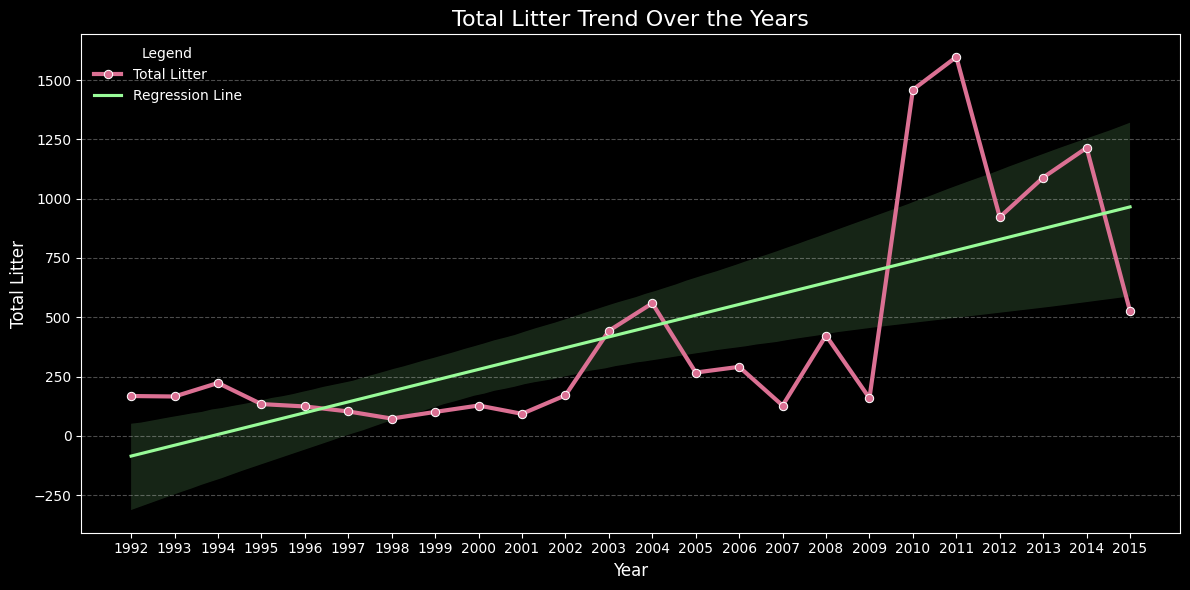

In [5]:
# Set the dark background style
plt.style.use("dark_background")

# Group data by 'year' and calculate the sum of total litter for each year
litter_trend = df.groupby('year').sum().reset_index()

# Create a line chart for the total litter over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=litter_trend, x='year', y='totallitter', marker='o', linewidth=3, color='palevioletred', label='Total Litter')
sns.regplot(data=litter_trend, x='year', y='totallitter', scatter=False, color='palegreen', label='Regression Line')

# Add titles and labels
plt.title('Total Litter Trend Over the Years', fontsize=16, color='white')
plt.xlabel('Year', fontsize=12, color='white')
plt.ylabel('Total Litter', fontsize=12, color='white')

# Adjust x-axis to show all year labels
plt.xticks(ticks=litter_trend['year'], labels=litter_trend['year'])  # Show all years as labels
plt.tight_layout()  # Ensure everything fits without overlap

# Customise grid
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add a legend
plt.legend(title="Legend", loc='upper left', fontsize=10, frameon=False, labelcolor='white')

# Show the plot
plt.show()


Findings: The findings from the bottom trawl marine litter survey show notable peaks in total litter in 2004, 2008, 2011, and 2014. The highest peak occurred in 2011, which may indicate a significant increase in marine litter during that year, potentially linked to heightened fishing activities, changes in waste disposal practices, or specific environmental events. Smaller peaks in 2004, 2008, and 2014 reflect fluctuations in litter levels, possibly due to variations in fishing intensity or other external factors like policy changes or environmental shifts. The regression line shows an upward trend, indicating an overall increase in marine litter over the years.

### 1.2 Total Litter Trend Category-Wise Over Time (With Plastic)

Purpose: To visualise the trends in litter counts across different categories over the years with a focus on identifying dominant categories.

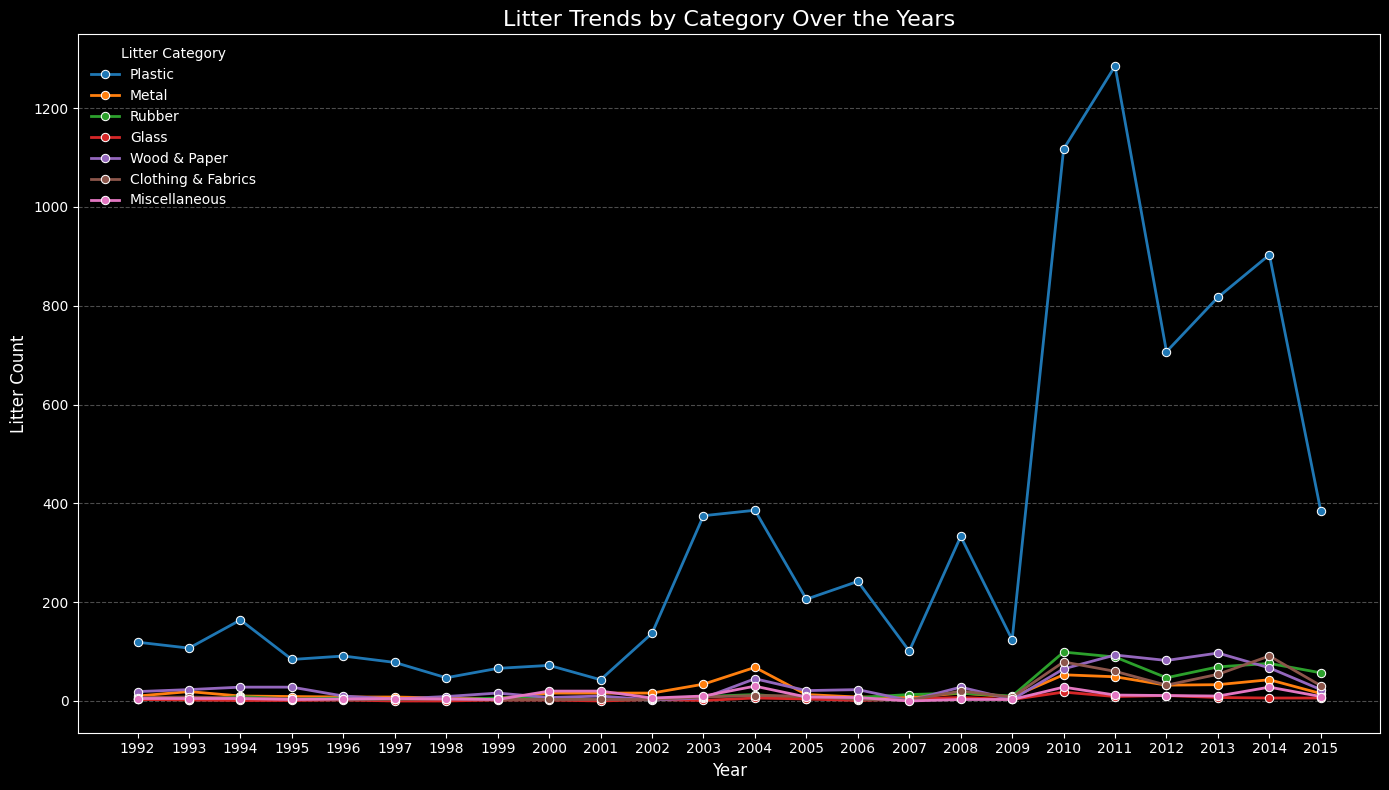

In [10]:
# Set the dark background style
plt.style.use("dark_background")

# Melt the DataFrame to long format for easier plotting
df_yearly_melted = df_yearly.melt('year', var_name='category', value_name='litter_count')

# Create a line chart for each category
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_yearly_melted, x='year', y='litter_count', hue='category', marker='o', linewidth=2, palette='tab10')

# Add titles and labels
plt.title('Litter Trends by Category Over the Years', fontsize=16, color='white')
plt.xlabel('Year', fontsize=12, color='white')
plt.ylabel('Litter Count', fontsize=12, color='white')

# Adjust x-axis to show all year labels
plt.xticks(ticks=df_yearly['year'], labels=df_yearly['year'])

# Customise grid
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add a legend
plt.legend(title="Litter Category", loc='upper left', fontsize=10, frameon=False, labelcolor='white')

# Show the plot
plt.tight_layout()
plt.show()

Findings: Plastic dominates the litter counts across all years; in the next visualisation, plastic will be excluded for clearer comparison of other categories.

### 1.3 Total Litter Trend Category-Wise Over Time (Without Plastic)

Purpose: To analyse trends in litter counts by category over the years, excluding plastic to better highlight variations among other categories.

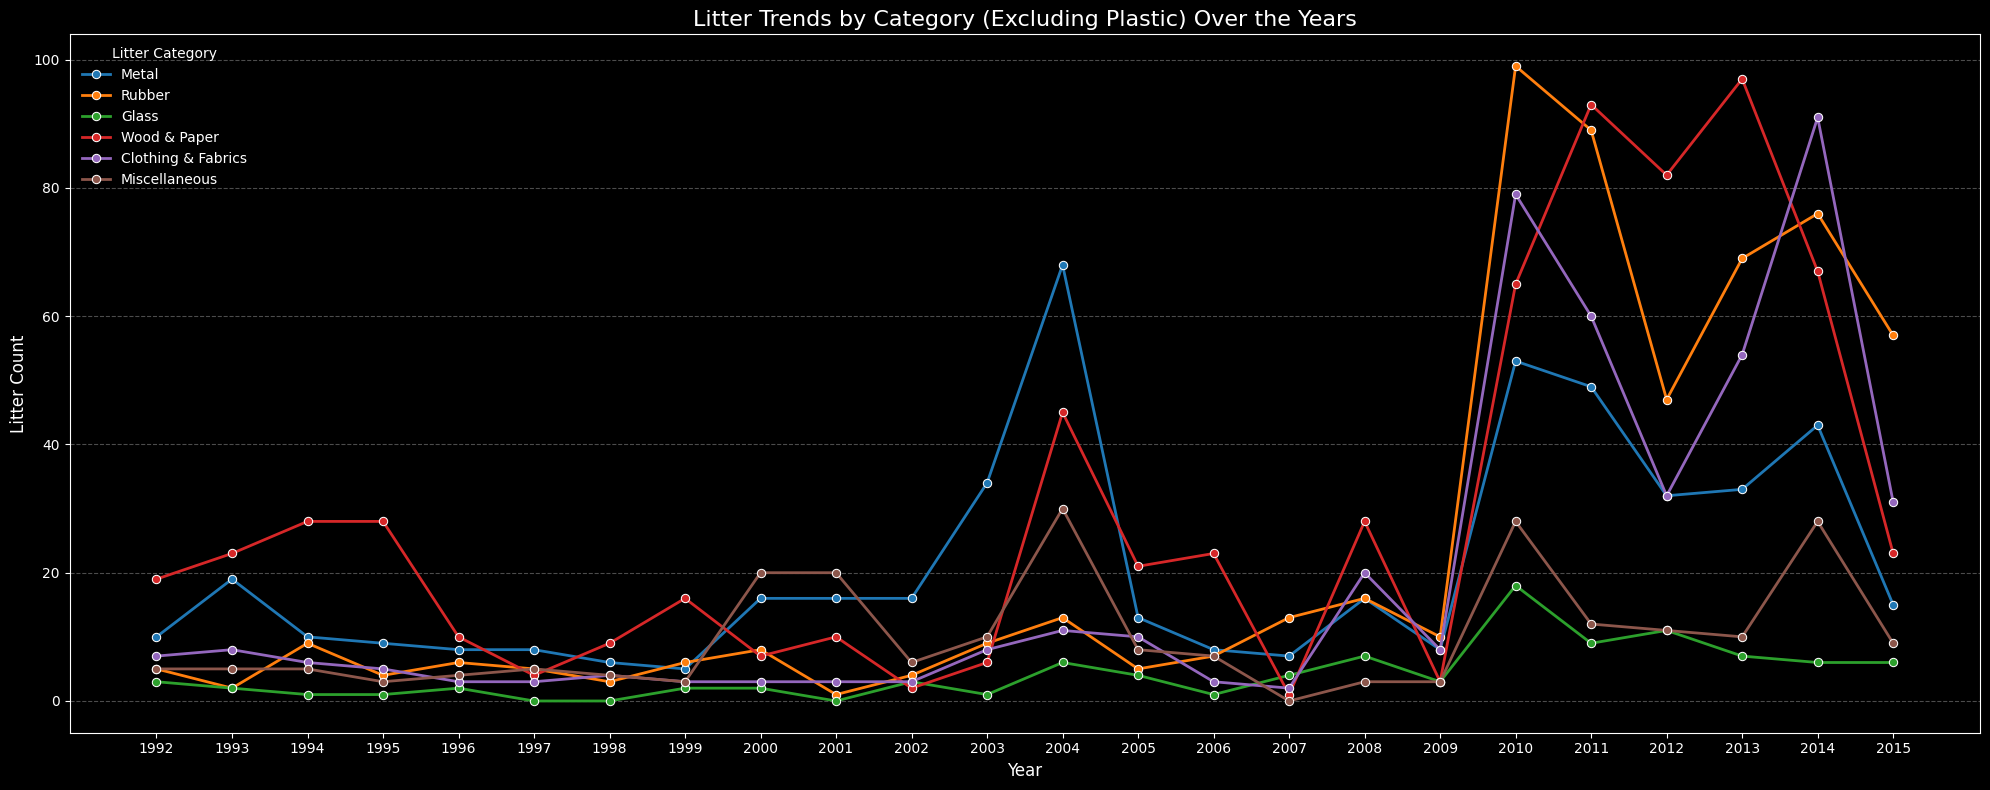

In [16]:
# Set the dark background style
plt.style.use("dark_background")

# Melt the DataFrame to long format for easier plotting
df_yearly_melted = df_yearly.melt('year', var_name='category', value_name='litter_count')

# Exclude 'Plastic' category
df_yearly_melted = df_yearly_melted[df_yearly_melted['category'] != 'Plastic']

# Create a line chart for each category
plt.figure(figsize=(20, 8))
sns.lineplot(data=df_yearly_melted, x='year', y='litter_count', hue='category', marker='o', linewidth=2, palette='tab10')

# Add titles and labels
plt.title('Litter Trends by Category (Excluding Plastic) Over the Years', fontsize=16, color='white')
plt.xlabel('Year', fontsize=12, color='white')
plt.ylabel('Litter Count', fontsize=12, color='white')

# Adjust x-axis to show all year labels
plt.xticks(ticks=df_yearly['year'], labels=df_yearly['year'])

# Customise grid
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add a legend
plt.legend(title="Litter Category", loc='upper left', fontsize=10, frameon=False, labelcolor='white')

# Show the plot
plt.tight_layout()
plt.show()

Findings: Wood and paper dominated from 1992 to 1995. Miscellaneous peaked around 2000. Metal spiked in 2003, dropping sharply in 2005, along with wood, paper, and miscellaneous. All categories peaked in 2009. Rubber peaked highest in 2019, followed by wood and paper, and clothing and fabrics. Bimodal peaks appeared from 2009 to 2015, with additional peaks in 2014–2015 and 2019.

AI speculation: 
'The sharp peak in 2009 across all categories could reflect increased environmental awareness or changes in waste management policies leading to better reporting. The bimodal peaks from 2009 to 2015 might suggest cyclical patterns in litter generation or cleanup efforts. The 2019 spike in rubber could be linked to increased tire disposal or synthetic material use. The 2005 drop in metal, wood, and paper might reflect improved recycling practices or economic changes reducing waste production.'

### 1.4 Total Litter Trend Category-Wise Over Time (Individual w/ Trend Line)

Purpose: To assess the trends of each category in more detail.

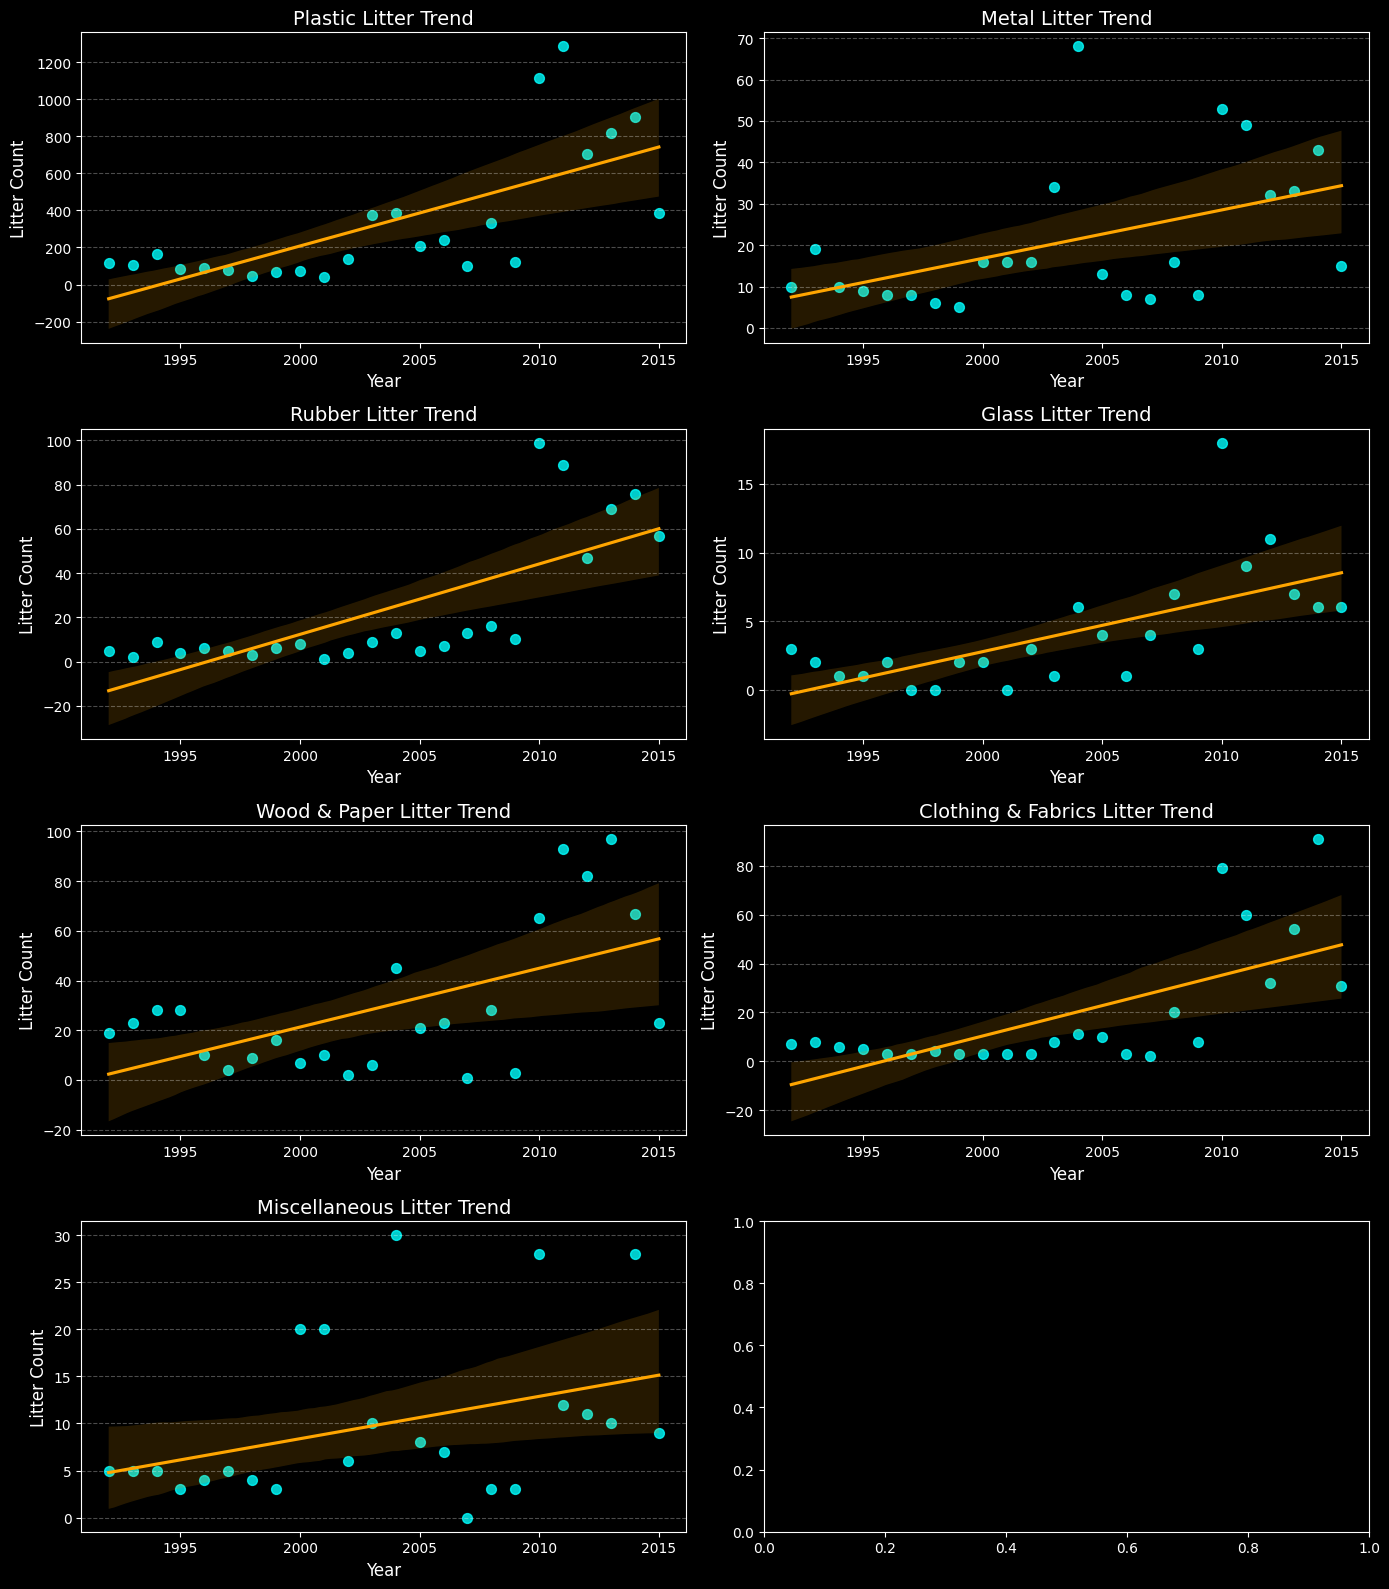

In [34]:
# Set the dark background style
plt.style.use("dark_background")

# Melt the DataFrame to long format for easier plotting
df_yearly_melted = df_yearly.melt('year', var_name='category', value_name='litter_count')

# Get unique categories
categories = df_yearly_melted['category'].unique()

# Create subplots (adjust the number of rows and columns as necessary)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each category and plot a regplot
for i, category in enumerate(categories):
    ax = axes[i]
    category_data = df_yearly_melted[df_yearly_melted['category'] == category]
    
    # Plot the regplot for the current category
    sns.regplot(data=category_data, x='year', y='litter_count', ax=ax, line_kws={"color": "orange"}, scatter_kws={"color": "cyan", "s": 50})
    
    # Set the title and labels
    ax.set_title(f'{category} Litter Trend', fontsize=14, color='white')
    ax.set_xlabel('Year', fontsize=12, color='white')
    ax.set_ylabel('Litter Count', fontsize=12, color='white')

    # Set grid and customize axes
    ax.grid(axis='y', linestyle='--', alpha=0.3)
    ax.tick_params(axis='both', which='major', labelsize=10, labelcolor='white')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Findings: An examination of litter trends from 1992 to 2015 in the North East Atlantic reveals notable shifts in the composition and quantity of waste found in marine environments. 

* **Plastic Litter:** A significant surge is observed from approximately 2010 onwards, suggesting a potential correlation with increased plastic consumption during this period. This pattern aligns with broader trends in packaging and single-use item usage.
* **Metal & Rubber Litter:** An uptick in metal and rubber litter from 2010 may indicate changes in manufacturing or industrial practices, where these materials are more prevalent.
* **Clothing Litter:** Clothing litter exhibits a consistent trend until 2010, followed by a marked increase. This shift likely reflects the rise of 'fast fashion' and the associated increase in textile waste.
* **Glass Litter:** Glass litter shows a relatively stable trend with a slight increase, indicating consistent levels of glass waste.
* **Wood & Paper Litter:** Wood and paper litter fluctuates but generally increases, highlighting the continued challenge of managing these waste streams.
* **Miscellaneous Litter:** Miscellaneous litter shows a fluctuating but relatively stable trend, indicating a consistent presence of varied waste items.

In light of these findings, it is crucial to advocate for enhanced recycling schemes and strategies to divert waste from marine environments. The observed increases in plastic, metal, rubber, and clothing waste highlight the need for comprehensive waste reduction strategies, including public awareness campaigns, improved recycling infrastructure, and policy interventions to address the root causes of litter in the North East Atlantic.

## Section 2: Litter Categories

### 2.1 Litter Composition by Category (All-time) - Polar Chart

Purpose: The purpose of the polar charts is to illustrate the distribution and prevalence of different types of litter in the sea, categorised by material type. Each polar chart displays the relative amounts of different items within each category of litter, providing a clear overview of where the most significant types of litter come from. 

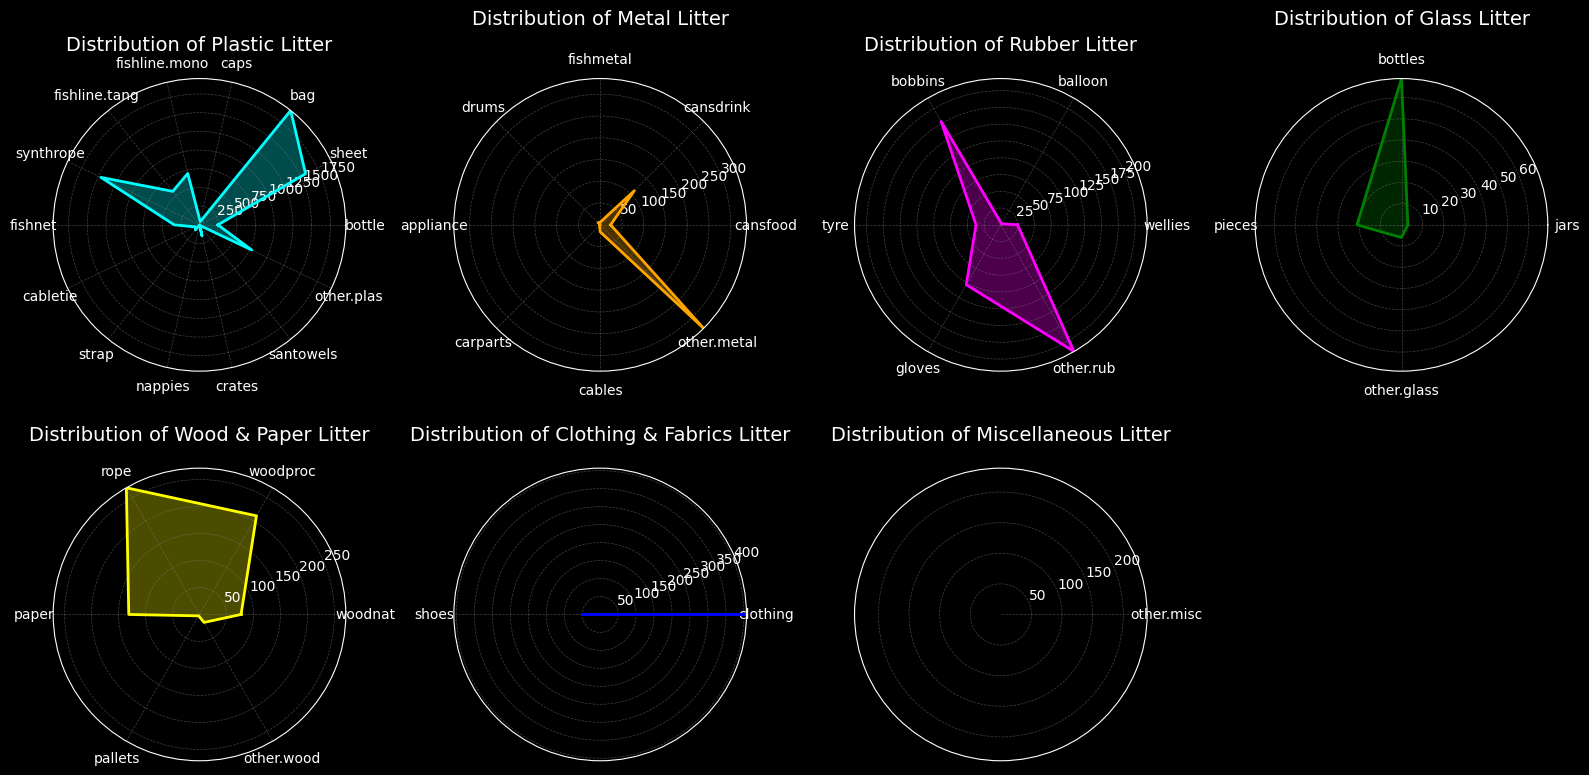

In [31]:
import numpy as np

# Categories dictionary
categories = {
    'Plastic': ['bottle', 'sheet', 'bag', 'caps', 'fishline.mono', 'fishline.tang', 'synthrope', 'fishnet', 'cabletie', 'strap', 'nappies', 'crates', 'santowels', 'other.plas'],
    'Metal': ['cansfood', 'cansdrink', 'fishmetal', 'drums', 'appliance', 'carparts', 'cables', 'other.metal'],
    'Rubber': ['wellies', 'balloon', 'bobbins', 'tyre', 'gloves', 'other.rub'],
    'Glass': ['jars', 'bottles', 'pieces', 'other.glass'],
    'Wood & Paper': ['woodnat', 'woodproc', 'rope', 'paper', 'pallets', 'other.wood'],
    'Clothing & Fabrics': ['clothing', 'shoes'],
    'Miscellaneous': ['other.misc']
}

# Set the dark background style
plt.style.use("dark_background")

# Define a list of distinct colors for each category
category_colors = {
    'Plastic': 'cyan',
    'Metal': 'orange',
    'Rubber': 'magenta',
    'Glass': 'green',
    'Wood & Paper': 'yellow',
    'Clothing & Fabrics': 'blue',
    'Miscellaneous': 'red'
}

# Create a subplot with a 2 rows, 4 columns layout
fig, axs = plt.subplots(2, 4, subplot_kw={'projection': 'polar'}, figsize=(16, 8)) 

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Iterate through each category and create a polar chart
for idx, (category, items) in enumerate(categories.items()):
    counts = [df[item].sum() for item in items]
    
    # Create polar plot
    theta = np.linspace(0, 2 * np.pi, len(items), endpoint=False)
    theta = np.concatenate((theta, [theta[0]]))  # Close the circle

    counts = np.concatenate((counts, [counts[0]]))  # Close the circle

    # Use the corresponding axis
    ax = axs[idx]

    # Use the category-specific color for the chart
    color = category_colors.get(category, 'white')  # Default to white if category not found
    ax.plot(theta, counts, color=color, linewidth=2)  # Line color
    ax.fill(theta, counts, color=color, alpha=0.3)  # Fill color

    ax.set_xticks(theta[:-1])  # Exclude the closing point from the ticks
    ax.set_xticklabels(items, color='white', fontsize=10)  # Adjust label size 

    ax.set_title(f'Distribution of {category} Litter', color='white', fontsize=14, pad=20)  # Title adjustments

    # Add grid lines
    ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

    # Adjust the radial limits to fit the data 
    ax.set_rlim(0, max(counts))

# Remove any empty subplots
for i in range(len(categories), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()  # Adjust layout
plt.show()

Findings: Findings: These visualisations reveal that plastic waste is the most prominent type of litter in the sea, particularly in the form of bags, sheets, and synthrope, with crates and nappies contributing to a smaller extent. Metal litter is largely driven by Other.metal, with drink cans forming a smaller peak. Rubber waste shows a broad distribution, with Other.rubber and bobbins being the largest contributors, while gloves remain minimal. In the Glass category, bottles and pieces dominate, while other glass items are negligible. Wood & Paper waste is led by natural rope, followed by woodproc and paper. Clothing is the primary contributor in the Clothing & Fabrics category, while shoes contribute less. Miscellaneous litter is barely visible. 

These findings highlight the need for targeted waste management strategies, particularly for plastic, rubber, and metal waste, while also focusing on glass and clothing recycling programmes.

### 2.2 Litter Composition by Litter Item (All-time) - Stacked Bar Chart

Purpose:

Findings:

### 2.3 Litter by Survey Area - Bar Chart

Purpose:

Findings:

### 2.4..?

Purpose:

Findings:

## Section 3: Further Analysis


9.1 Explore relevant applications of data analytics in the chosen data domain, indicating a breadth of understanding and curiosity: Learners can include a section in their notebook or dashboard that discusses the application of analytics within the dataset’s domain, such as healthcare, retail, or finance, and how data analytics is useful for solving specific challenges.

9.2 Explain how data analytics and AI can address specific challenges or opportunities: Learners can outline AI solutions (e.g., Copilot or gen AI ideation) used in the analysis and their impact on solving domain-specific problems.

- map analysis